In [18]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import random
import copy

ind_num = 2 #一世代の個体数
gen_num = 1000 #目標の世代数
co_method_num = 0 #交叉の方法
selection_method_num = 0 #淘汰の方法
mutation_probability = 0.1 #突然変異の確率
point_num = 8



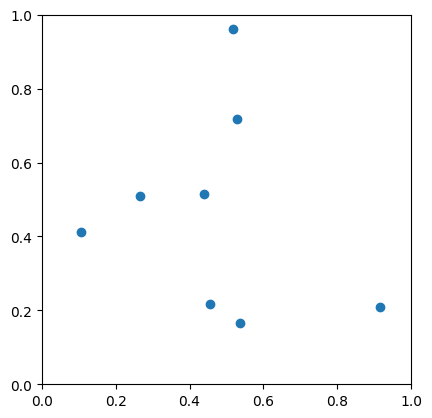

In [20]:

#point_list = list(range(point_num))
xPos = np.random.rand(point_num)#ポイントの数だけランダムな座標を生成
yPos = np.random.rand(point_num)
#print(xPos,"\n", yPos)

fig = plt.figure()
ax = fig.add_subplot()
plt.plot(xPos, yPos, marker = "o", linestyle = "none")#生成した座標の点のみ描画
ax.set_aspect('equal', adjustable='box')
plt.xlim(0, 1)
plt.ylim(0, 1)

coordinate = np.transpose(np.stack([xPos, yPos]))
#print(coordinate)
#print(coordinate[1])

In [21]:
class Individual:
  coordinate = 0
  point_num = 0

  def __init__(self, input=0):
    if input == 0:
      self.chromosome = list(range(Individual.point_num))
      random.shuffle(self.chromosome)
    else:
      self.chromosome = input
    self.getFitness()
    #print(self.chromosome)

  def setDefaultCoordinate(self, input):
    Individual.coordinate = copy.deepcopy(input)
  
  def setChromosome(self, input):
    self.chromosome = input

  def getFitness(self):
    self.fitness = 0
    self.temp = []
    for j in range(len(self.chromosome)):
      self.temp.append(Individual.coordinate[self.chromosome[j]])
    #print(self.temp)
    #print(self.coordinate)

    for i in range(len(self.temp)):
      a=self.temp[i]
      if i == len(self.temp)-1:
        b=self.temp[0]
      else:
        b=self.temp[i+1]
      distance=np.linalg.norm(b-a)
      self.fitness += distance
    #print(self.fitness)

  def getChromosomse(self):
    return_chromo = copy.deepcopy(self.chromosome)
    return return_chromo

In [22]:
def mutation_2(ind):
  new_chromo = copy.deepcopy(ind.chromosome)
  r1 = random.randint(0, len(ind.chromosome) -1)
  r2 = random.randint(0, len(ind.chromosome) -1)
  while r1 == r2:
    r2 = random.randint(0, len(ind.chromosome) -1)

  #print(r1,r2)
  temp = new_chromo[r1]
  new_chromo[r1] = new_chromo[r2]
  new_chromo[r2] = temp
  ind.setChromosome(new_chromo)
  
def mutation_ALL(ind):#壊れすぎてダメかも
  new_chromo = list(range(len(ind.chromosome)))
  random.shuffle(new_chromo)
  ind.setChromosome(new_chromo)


In [23]:
Individual.point_num = point_num
Individual.coordinate = copy.deepcopy(coordinate)
test_ind = Individual()
print(test_ind.chromosome)
print(test_ind.fitness)

mutation_ALL(test_ind)

test_ind.getFitness()
print(test_ind.chromosome)
print(test_ind.fitness)

[6, 0, 2, 4, 3, 5, 7, 1]
3.6763394865661896
[5, 1, 3, 4, 0, 7, 2, 6]
3.935740620356029


pmx実装案　部分写像交叉

　部分写像交叉はGoldberg らにより提案された方法である．親の一方からはその部分経路をそのまま受け継ぎ，他の親からも残りの都市について，できるだけ多く親の順番を受け継ぐことを 目的にしている． そのために，２つのランダムに選んだ切断点間の部分経路を選び，以下に示す交叉を 行う．
例えばつぎに示す２つの親の経路の交叉を考える．
　p1=(1 2 3 | 4 5 6 7 | 8 9)
　p2=(4 5 2 | 1 8 7 6 | 9 3)
まず縦棒 | にて示した２点で挟まれた部分を交叉するとつぎに示す子が得られる． ここで * は今のところ未決定であることを示す．
　c1=(* * * | 1 8 7 6 | * *)
　c2=(* * * | 4 5 6 7 | * *)
このことは次の入れ替えを定義していることにもなる． 　1 <-> 4, 8 <-> 5, 7 <-> 6, 6 <-> 7
残りの未決定の部分について，既定のものと衝突を起こさないもの （即ち，既定のものに含まれないもの）はそのまま入れると，つぎの経路が得られる．
　c1=(* 2 3 | 1 8 7 6 | * 9)
　c2=(* * 2 | 4 5 6 7 | 9 3)
最後に残った部分には前記の入れ替えの定義を参照して衝突を起こさないように入れる．即ち，c1 については１番目の * には1の代わりに4を入れ， ８番目の * には8 の代わりに 5 を入れる．同様の操作を c2 についても 行うと次の経路が得られる．
　o1=(4 2 3 | 1 8 7 6 | 5 9)
　o2=(1 8 2 | 4 5 6 7 | 9 3)


線の位置を2個決める
    先にカットする長さを決める4~6割くらい？最初は固定、引数で決める？ランダム？
    始点を決めてそこから指定した数はカット
    ( 0, 1, 2 | *, *, * | 6, 7, 8, 9)
        　　←終点　　　始点→
    見たいなのもできるように遺伝子自体をランダムに回転？させる
    (* | 6, 7, 8, 9, 0, 1, 2 | * *)
    みたいにスライドさせる？


In [6]:
class TestCO:
  def co(self,input):
    leng = len(input)
    for i in range(0, leng, 2):
      p1 = copy.deepcopy(input[i].chromosome)
      p2 = copy.deepcopy(input[i+1].chromosome)
      ret = self.cotst1201(p1,p2)

      input.append(Individual(ret[0]))
      input.append(Individual(ret[1]))



  def cotst1201(self,input1, input2):
    #print("start co")
    p1 = copy.deepcopy(input1)
    p2 = copy.deepcopy(input2)
    c1 = [-1] * len(p1) #-1で埋めた配列を作成
    c2 = [-1] * len(p2)
    r = random.randrange(len(p1))
    #print(r ,"番目") 
    c1[r] = p1[r]
    c2[r] = p2[r]

    index1 = p1.index(p2[r])
    index2 = p2.index(p1[r])

    c1[index1] = p1[index1]
    c2[index2] = p2[index2] #p1[r] と p2[r]の位置を固定、またp1中のp2[r]と一致する要素の位置も固定する
    #p1[x,x,2,x,x,4] p2[x,x,4,2,x,x] となっている場合、r=2
    

    #print(c1)
    #print(c2)
      
    del1 = p1.pop(r)
    del2 = p2.pop(r)
    if not del1 == del2:
      p1.remove(del2)
      p2.remove(del1)

    #print(p1)
    #print(p2)
    cout1 = cout2 = 0
    for i in range(len(c1)):
    
      if c1[i] == -1:
        c1[i] = p2[cout1]
        cout1 += 1
      if c2[i] == -1:
        c2[i] = p1[cout2]
        cout2 += 1

    
    #print(c1)
    #print(c2)
    #print("end co")
    return [c1,c2]

In [79]:
class PMX:
    def co(self,input):
        leng = len(input)
        for i in range(0, leng, 2):
          p1 = copy.deepcopy(input[i].chromosome)
          p2 = copy.deepcopy(input[i+1].chromosome)
          ret = self.pmx_co(p1,p2)

          #input.append(Individual(ret[0]))
          #input.append(Individual(ret[1]))
    
    def pmx_co(self,input1, input2):
        #print("start co")
        copy_1 = copy.deepcopy(input1)
        copy_2 = copy.deepcopy(input2)
        new_1 = [-1] * len(copy_1)
        new_2 = [-1] * len(copy_2)

        cut_len = 3
        #cut_len = int(len(copy_1)/2)# 半分にする。可変長にするならここを変える
        cut_start_point = random.randint(0, len(copy_1) - 1) # どこから切り取るか
        copy_1 = copy_1[cut_start_point:] + copy_1[:cut_start_point]#カットの始点が先頭に来るように配列を回転させる
        copy_2 = copy_2[cut_start_point:] + copy_2[:cut_start_point]
        #copy_1の0~cut_lenの要素をnew_1にコピー
        for i in range(cut_len):
            new_1[i] = copy_2[i]
            new_2[i] = copy_1[i]
        
        print(cut_start_point)
        print(new_1)
        print(new_2)
        #ここから
        """new_1 = new_1[:cut_len]
        new_1 = new_1 + list(set(copy_1) - set(new_1))
        new_2 = new_2[:cut_len]
        new_2 = new_2 + list(set(copy_2) - set(new_2))
        ##なんかちがうよ##ここまで
        #先に衝突をしないものを同じ場所に入れる
        print(new_1)
        print(new_2)"""

        for i in range(len(copy_1)):
            if not new_1[i] == -1:
                #if new_1に重複する要素がなかったら
                if not copy_1[i] in new_1:
                    new_1[i] = copy_1[i]






        
        return [copy_1,copy_2]

        



    
    

In [80]:
genelation=[]
plot_lst = list()
Individual.point_num = point_num
Individual.coordinate = copy.deepcopy(coordinate)
for i in range(ind_num):
  genelation.append(Individual())
genelation[0].setChromosome([0,1,2,3,4,5,6,7])
genelation[1].setChromosome([7, 4, 6, 2, 3, 0, 1, 5])

for i in range(ind_num):
  print(genelation[i].chromosome)

clossOver = PMX()
clossOver.co(genelation)
print("\n")



[0, 1, 2, 3, 4, 5, 6, 7]
[7, 4, 6, 2, 3, 0, 1, 5]
2
[6, 2, 3, -1, -1, -1, -1, -1]
[2, 3, 4, -1, -1, -1, -1, -1]
[6, 2, 3, 0, 1, 4, 5, 7]
[2, 3, 4, 0, 1, 5, 6, 7]




In [33]:
genelation=[]
plot_lst = list()
Individual.point_num = point_num
Individual.coordinate = copy.deepcopy(coordinate)
for i in range(ind_num):
  genelation.append(Individual())
genelation[0].setChromosome([0,1,2,3,4,5,6,7])
genelation[1].setChromosome([7, 4, 6, 2, 3, 0, 1, 5])

for i in range(ind_num):
  print(genelation[i].chromosome)

clossOver = TestCO()
clossOver.co(genelation)
print("\n")

for i in range(4):
  print(genelation[i].chromosome)


[0, 1, 2, 3, 4, 5, 6, 7]
[7, 4, 6, 2, 3, 0, 1, 5]


[0, 1, 2, 3, 4, 5, 6, 7]
[7, 4, 6, 2, 3, 0, 1, 5]
[4, 6, 2, 3, 0, 5, 1, 7]
[7, 0, 1, 2, 3, 4, 6, 5]
